In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data.csv")
data

,Season,Cultivar,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
0,1,NEO 760 CE,1,58.80,15.20,98.20,177.80,1.81,5.20,152.20,3232.820000
1,1,NEO 760 CE,2,58.60,13.40,102.00,195.00,1.85,7.20,141.69,3517.360000
2,1,NEO 760 CE,3,63.40,17.20,100.40,203.00,2.02,6.80,148.81,3391.460000
3,1,NEO 760 CE,4,60.27,15.27,100.20,191.93,1.89,6.40,148.50,3312.580000
4,1,MANU IPRO,1,81.20,18.00,98.80,173.00,1.75,7.40,145.59,3230.990000
...,...,...,...,...,...,...,...,...,...,...,...
315,2,FTR 4288 IPRO,4,88.33,16.33,75.73,139.00,1.84,3.67,135.19,3348.931034
316,2,FTR 3190 IPRO,1,64.40,16.60,76.00,168.00,2.21,3.60,145.69,3418.850575
317,2,FTR 3190 IPRO,2,64.60,17.60,116.80,271.20,2.32,3.80,147.24,3651.586207
318,2,FTR 3190 IPRO,3,58.80,14.80,86.40,180.60,2.09,2.20,156.32,3487.931034


In [3]:
'''
Using PH (Plant Height), IFP (Depth of the insertion of the first pot), NLP (Number of stem), NGP (Number of legumes per plant),
NGL (Number of grains per plant), NS (Number of grains per pod), MHG (Thousand seed weight), GY (Grain yield)
to cluster soybean based on it's quality, with the assumption of having a high number in those attributes means having a good quality
'''
data.drop('Cultivar', axis=1, inplace=True)
data.drop('Season', axis=1, inplace=True)
data.drop('Repetition', axis=1, inplace=True)
data

,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
0,58.80,15.20,98.20,177.80,1.81,5.20,152.20,3232.820000
1,58.60,13.40,102.00,195.00,1.85,7.20,141.69,3517.360000
2,63.40,17.20,100.40,203.00,2.02,6.80,148.81,3391.460000
3,60.27,15.27,100.20,191.93,1.89,6.40,148.50,3312.580000
4,81.20,18.00,98.80,173.00,1.75,7.40,145.59,3230.990000
...,...,...,...,...,...,...,...,...
315,88.33,16.33,75.73,139.00,1.84,3.67,135.19,3348.931034
316,64.40,16.60,76.00,168.00,2.21,3.60,145.69,3418.850575
317,64.60,17.60,116.80,271.20,2.32,3.80,147.24,3651.586207
318,58.80,14.80,86.40,180.60,2.09,2.20,156.32,3487.931034


In [4]:
# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
data

,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
0,58.80,15.20,98.20,177.80,1.81,5.20,152.20,3232.820000
1,58.60,13.40,102.00,195.00,1.85,7.20,141.69,3517.360000
2,63.40,17.20,100.40,203.00,2.02,6.80,148.81,3391.460000
3,60.27,15.27,100.20,191.93,1.89,6.40,148.50,3312.580000
4,81.20,18.00,98.80,173.00,1.75,7.40,145.59,3230.990000
...,...,...,...,...,...,...,...,...
315,88.33,16.33,75.73,139.00,1.84,3.67,135.19,3348.931034
316,64.40,16.60,76.00,168.00,2.21,3.60,145.69,3418.850575
317,64.60,17.60,116.80,271.20,2.32,3.80,147.24,3651.586207
318,58.80,14.80,86.40,180.60,2.09,2.20,156.32,3487.931034


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

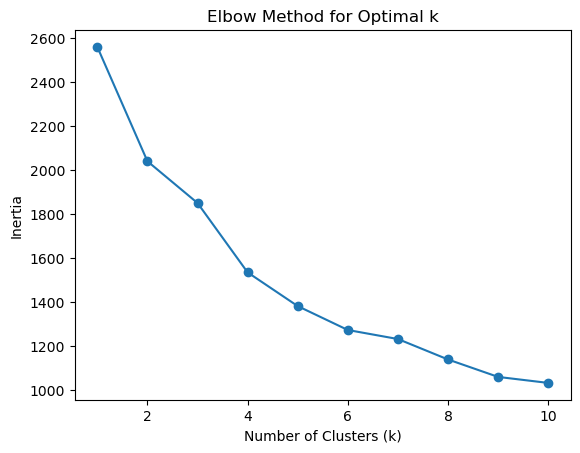

K=2, Silhouette Score: 0.4780
K=3, Silhouette Score: 0.3228
K=4, Silhouette Score: 0.3361
K=5, Silhouette Score: 0.3596
K=6, Silhouette Score: 0.3703
K=7, Silhouette Score: 0.3539
K=8, Silhouette Score: 0.3735
K=9, Silhouette Score: 0.3662
K=10, Silhouette Score: 0.3625


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

In [5]:
# Determining the most optimal K using both elbow method and silhouette score
# Elbow method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42) #the Answer to the Ultimate Question of Life, the Universe and Everything.
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()
# Reducing features to 2 using PCA for better clustering and data visualization
pca = PCA(n_components=2)  # Reduce to 2D for better clustering
reduced_data = pca.fit_transform(scaled_data)
# Silhouette score
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(reduced_data)
    score = silhouette_score(reduced_data, labels)
    print(f'K={k}, Silhouette Score: {score:.4f}')

In [6]:
# K=2 from elbow method and silhouette score
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(reduced_data) 

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


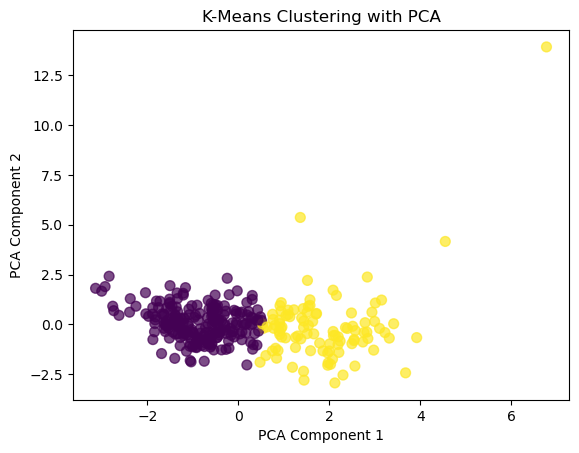

In [7]:
# pca first then kmeans
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, s=50, alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering with PCA')
plt.show()